# 3 - Classification Models
by: Torres Espinosa, Jose Antonio

In [1]:
# Dependencies
import sys
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
from time import time

# from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, \
    roc_auc_score, classification_report

# Own Modules
sys.path.append('./utils/')
from utils.dataprocesor import Preprocessor

# Data Preprocess 

In [2]:
p = Preprocessor()
# Impute, Scale and split them
prec_sc, rain_sc = p.preprocess_data(verbose=True)

2023-09-24 21:40:30.570 INFO    root: Preprocessor()
2023-09-24 21:40:30,570 [INFO]: root: Preprocessor()
2023-09-24 21:40:30.572 INFO    root: OpenData()
2023-09-24 21:40:30,572 [INFO]: root: OpenData()
2023-09-24 21:40:30.573 INFO    root: read_csv(data/data-01-22.csv)
2023-09-24 21:40:30,573 [INFO]: root: read_csv(data/data-01-22.csv)
2023-09-24 21:40:30.644 INFO    root: preprocess_data(verbose=True)
2023-09-24 21:40:30,644 [INFO]: root: preprocess_data(verbose=True)
2023-09-24 21:40:30.645 INFO    root: Xy(, verbose=False)
2023-09-24 21:40:30,645 [INFO]: root: Xy(, verbose=False)


In [3]:
# Check data
print('Keys: ' + str(p.splited['prec'].keys()),
      'Prec: ' + str([data.shape for data in p.splited['prec'].values()]),
      'Rain: ' + str([data.shape for data in p.splited['rain'].values()]),
      'Columns: ' + str(p.splited['rain']['X_train'].columns), sep='\n')

Keys: dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])
Prec: [(5883, 6), (1961, 6), (5883,), (1961,)]
Rain: [(2046, 6), (682, 6), (2046,), (682,)]
Columns: Index(['tmed', 'tmin', 'tmax', 'velmedia', 'racha', 'presMin'], dtype='object')


In [4]:
p.splited['rain'].keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

# Models

#### I - KNeighborsClassifier

* Manual optimal search

In [5]:
# Errors
error_train, error_test, error_all = [],[],[]
# Train loop
for i in range(1, 31):
    # Model
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
    # Predictions
    pred_test = knn.predict((p.splited['rain']['X_test']))
    pred_train = knn.predict(p.splited['rain']['X_train'])
    pred_all = knn.predict(rain_sc)
    # Error eval
    error_train.append(1 - balanced_accuracy_score(p.splited['rain']['y_train'],
                                                   pred_train))
    error_test.append(1 - balanced_accuracy_score(p.splited['rain']['y_test'],
                                                  pred_test)) 
    error_all.append(1 - balanced_accuracy_score(p.y['rain'], pred_all))

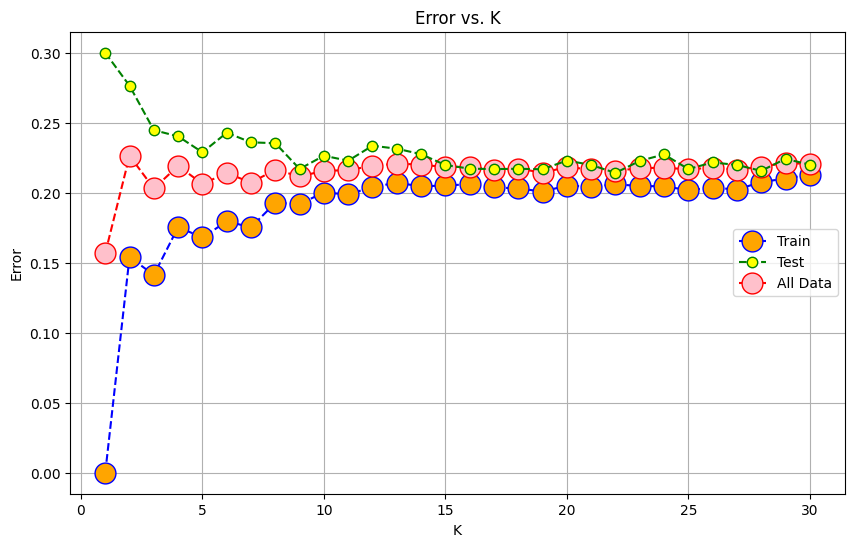

In [6]:
%matplotlib inline
# -- Graph - Error vs k --
plt.rcParams['figure.figsize'] = [10, 6]
# Train Data Results
plt.plot(range(1,31), error_train, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='orange', markersize = 15)
# Test Data Results
plt.plot(range(1,31), error_test, color='green', linestyle='dashed',
         marker='.', markerfacecolor='yellow', markersize = 15, zorder=3)
# Dataset Results
plt.plot(range(1,31), error_all, color='red', linestyle='dashed',
         marker='o', markerfacecolor='pink', markersize = 15)
# Graphic params
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(["Train", 'Test', "All Data"], loc='center right')
plt.grid()
plt.show()

The top 5 avoiding overtraining would have 'k' equal to 5, 7 or 9.

* Metrics

In [8]:
# -- KNeighborsClassifier
k_mod = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

KNeighborsClassifier(metric='euclidean')

In [9]:
# Predictions
y_pred = k_mod.predict(p.splited['rain']['X_test'])
y_pred1 = k_mod.predict(p.splited['rain']['X_train'])
y_pred2 = k_mod.predict(rain_sc)
print("Use KNeighborsClassifier(k=5) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use KNeighborsClassifier(k=5) conf_matrix/roc:
  - Test data:
 [[270  76]
 [ 80 256]] 0.7711257913570052 
  - Train data:
 [[859 159]
 [185 843]] 0.8319251526988908 
  - All data:
 [[5065 1415]
 [ 265 1099]] 0.7936771387712247


In [10]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T  # k=5

,precision,recall,f1-score,support
No rain,0.950281,0.781636,0.857748,6480.0
Rain,0.437152,0.805718,0.566787,1364.0
macro avg,0.693717,0.793677,0.712267,7844.0
weighted avg,0.861053,0.785824,0.807152,7844.0


In [11]:
# -- KNeighborsClassifier
k_mod = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
k_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [12]:
# Predictions
y_pred = k_mod.predict(p.splited['rain']['X_test'])
y_pred1 = k_mod.predict(p.splited['rain']['X_train'])
y_pred2 = k_mod.predict(rain_sc)
print("Use KNeighborsClassifier(k=7) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use KNeighborsClassifier(k=7) conf_matrix/roc:
  - Test data:
 [[263  83]
 [ 78 258]] 0.7639863748967795 
  - Train data:
 [[853 165]
 [194 834]] 0.8246007659789165 
  - All data:
 [[5086 1394]
 [ 272 1092]] 0.7927315267369031


In [13]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T  # k=7

,precision,recall,f1-score,support
No rain,0.949235,0.784877,0.859267,6480.0
Rain,0.439260,0.800587,0.567273,1364.0
macro avg,0.694247,0.792732,0.713270,7844.0
weighted avg,0.860555,0.787608,0.808492,7844.0


In [14]:
# -- KNeighborsClassifier
k_mod = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
k_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [15]:
# Predictions
y_pred = k_mod.predict(p.splited['rain']['X_test'])
y_pred1 = k_mod.predict(p.splited['rain']['X_train'])
y_pred2 = k_mod.predict(rain_sc)
print("Use KNeighborsClassifier(k=9) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use KNeighborsClassifier(k=9) conf_matrix/roc:
  - Test data:
 [[271  75]
 [ 73 263]] 0.7829875447288743 
  - Train data:
 [[837 181]
 [212 816]] 0.8079873559967281 
  - All data:
 [[5090 1390]
 [ 285 1079]] 0.7882747728177836


In [16]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T  # k=9

,precision,recall,f1-score,support
No rain,0.946977,0.785494,0.858709,6480.0
Rain,0.437019,0.791056,0.563005,1364.0
macro avg,0.691998,0.788275,0.710857,7844.0
weighted avg,0.858300,0.786461,0.807289,7844.0


#### II - RandomForest

* Manual optimal search

In [49]:
# Errors
errors = {}
# Train loop
for d in range(1, 26):
    for cc in [0, .1, .01, .001, .0001]:
        error_test, error_train, error_all = 0, 0, 0
        clf = RandomForestClassifier(max_depth=d, ccp_alpha=cc,
                                criterion='log_loss', random_state=seed(time()))
        clf.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
        # Predictions
        pred_all = clf.predict(rain_sc)
        pred_train = clf.predict(p.splited['rain']['X_train'])
        pred_test = clf.predict(p.splited['rain']['X_test'])
        # Error eval
        error_test = 1 - balanced_accuracy_score(p.splited['rain']['y_test'],
                                                 pred_test)
        error_train = 1 - balanced_accuracy_score(p.splited['rain']['y_train'],
                                                  pred_train)
        error_all = 1 - balanced_accuracy_score(p.y['rain'], pred_all)
        errors.update({f'{d}-{cc}':[error_test, error_train, error_all]})

In [67]:
# Top results
rf_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
rf_results.sort_values(by='All').query('Train > .01').head(15)

,Test,Train,All
14-0.001,0.220875,0.010753,0.127685
13-0.0001,0.226741,0.011735,0.127878
13-0,0.228186,0.015650,0.128052
13-0.001,0.229803,0.017105,0.131525
12-0.0001,0.219473,0.026403,0.132953
12-0,0.222406,0.029317,0.133879
12-0.001,0.231205,0.032750,0.136888
11-0,0.219344,0.045458,0.139242
11-0.001,0.216668,0.051814,0.145512
11-0.0001,0.225296,0.052286,0.146072


* Metrics

In [75]:
# -- RandomForestClassifier
rf_mod = RandomForestClassifier(max_depth=13, ccp_alpha=.0001, criterion='log_loss')
rf_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

RandomForestClassifier(ccp_alpha=0.0001, criterion='log_loss', max_depth=13)

In [76]:
# Predictions
y_pred = rf_mod.predict(p.splited['rain']['X_test'])
y_pred1 = rf_mod.predict(p.splited['rain']['X_train'])
y_pred2 = rf_mod.predict(rain_sc)
print("Use RandomForestClassifier(13-0.0001) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(13-0.0001) conf_matrix/roc:
  - Test data:
 [[260  86]
 [ 62 274]] 0.7834606385906964 
  - Train data:
 [[1004   14]
 [   9 1019]] 0.9887463401955463 
  - All data:
 [[5192 1288]
 [  71 1293]] 0.8745908909887405


In [77]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.986510,0.801235,0.884271,6480.0
Rain,0.500969,0.947947,0.655513,1364.0
macro avg,0.743739,0.874591,0.769892,7844.0
weighted avg,0.902078,0.826747,0.844493,7844.0


In [54]:
# -- RandomForestClassifier
rf_mod = RandomForestClassifier(max_depth=13, ccp_alpha=0, criterion='log_loss')
rf_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

RandomForestClassifier(ccp_alpha=0, criterion='log_loss', max_depth=13)

In [55]:
# Predicitons
y_pred = rf_mod.predict(p.splited['rain']['X_test'])
y_pred1 = rf_mod.predict(p.splited['rain']['X_train'])
y_pred2 = rf_mod.predict(rain_sc)
print("Use RandomForestClassifier(13-0) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(13-0) conf_matrix/roc:
  - Test data:
 [[257  89]
 [ 62 274]] 0.7791253784750894 
  - Train data:
 [[1002   16]
 [  15 1013]] 0.9848457339866833 
  - All data:
 [[5223 1257]
 [  77 1287]] 0.8747834528076464


In [56]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.985472,0.806019,0.886757,6480.0
Rain,0.505896,0.943548,0.658649,1364.0
macro avg,0.745684,0.874783,0.772703,7844.0
weighted avg,0.902078,0.829934,0.847091,7844.0


In [63]:
# -- RandomForestClassifier
rf_mod = RandomForestClassifier(max_depth=13, ccp_alpha=.001, criterion='log_loss')
rf_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

RandomForestClassifier(ccp_alpha=0.001, criterion='log_loss', max_depth=13)

In [64]:
# Predictions
y_pred = rf_mod.predict(p.splited['rain']['X_test'])
y_pred1 = rf_mod.predict(p.splited['rain']['X_train'])
y_pred2 = rf_mod.predict(rain_sc)
print("Use RandomForestClassifier(13-0.001) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(13-0.001) conf_matrix/roc:
  - Test data:
 [[257  89]
 [ 62 274]] 0.7791253784750894 
  - Train data:
 [[1005   13]
 [  26 1002]] 0.9809690168408339 
  - All data:
 [[5172 1308]
 [  88 1276]] 0.866816009557945


In [65]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T  # d=10, cc=.0001

,precision,recall,f1-score,support
No rain,0.983270,0.798148,0.881090,6480.0
Rain,0.493808,0.935484,0.646403,1364.0
macro avg,0.738539,0.866816,0.763747,7844.0
weighted avg,0.898157,0.822030,0.840280,7844.0


#### III - DecisionTree

* Manual optimal search

In [23]:
# Errors
errors = {}
# Train loop
for d in range(1, 26):
    for cc in [0, .1, .01, .001, .0001]:
        error_test, error_train, error_all = 0, 0, 0
        clf = DecisionTreeClassifier(max_depth=d,ccp_alpha=cc,criterion='log_loss')
        clf.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
        # Predictions
        pred_all = clf.predict(rain_sc)
        pred_train = clf.predict(p.splited['rain']['X_train'])
        pred_test = clf.predict(p.splited['rain']['X_test'])
        # Error eval
        error_test = 1 - balanced_accuracy_score(p.splited['rain']['y_test'], pred_test)
        error_train = 1 - balanced_accuracy_score(p.splited['rain']['y_train'], pred_train)
        error_all = 1 - balanced_accuracy_score(p.y['rain'], pred_all)
        errors.update({f'{d}-{cc}':[error_test, error_train, error_all]})

In [24]:
# Top results
dt_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
dt_results.sort_values(by='All').query('Train > .01').head(15)

,Test,Train,All
16-0,0.303307,0.021507,0.166462
16-0.0001,0.304645,0.021517,0.167021
18-0,0.313451,0.010270,0.167349
15-0.0001,0.300458,0.026472,0.167562
24-0.001,0.313364,0.013792,0.170147
22-0.001,0.307408,0.016240,0.170186
15-0,0.309263,0.027886,0.170513
18-0.0001,0.311940,0.010840,0.170725
16-0.001,0.301538,0.030914,0.170919
20-0.001,0.313192,0.019183,0.171285


* Metrics

In [33]:
# -- DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=16, ccp_alpha=0, criterion='log_loss')
dt.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
pred_all = dt.predict(rain_sc)

In [34]:
# Predictions
y_pred = dt.predict(p.splited['rain']['X_test'])
y_pred1 = dt.predict(p.splited['rain']['X_train'])
y_pred2 = dt.predict(rain_sc)
print("Use RandomForestClassifier(16-0) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(16-0) conf_matrix/roc:
  - Test data:
 [[231 100]
 [111 240]] 0.6908229400676531 
  - Train data:
 [[1016   17]
 [  23  990]] 0.9804191206474592 
  - All data:
 [[4945 1535]
 [ 134 1230]] 0.8324384073712031


In [35]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.973617,0.763117,0.855610,6480.0
Rain,0.444846,0.901760,0.595786,1364.0
macro avg,0.709232,0.832438,0.725698,7844.0
weighted avg,0.881668,0.787226,0.810429,7844.0


In [36]:
# -- DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=16, ccp_alpha=.0001, criterion='log_loss')
dt.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
pred_all = dt.predict(rain_sc)

In [37]:
# Predictions
y_pred = dt.predict(p.splited['rain']['X_test'])
y_pred1 = dt.predict(p.splited['rain']['X_train'])
y_pred2 = dt.predict(rain_sc)
print("Use RandomForestClassifier(16-0.0001) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(16-0.0001) conf_matrix/roc:
  - Test data:
 [[237  94]
 [108 243]] 0.7041598884499186 
  - Train data:
 [[1011   22]
 [  21  992]] 0.9789861519510642 
  - All data:
 [[4952 1528]
 [ 129 1235]] 0.8348113754027732


In [38]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.974611,0.764198,0.856673,6480.0
Rain,0.446978,0.905425,0.598498,1364.0
macro avg,0.710795,0.834811,0.727585,7844.0
weighted avg,0.882861,0.788756,0.811779,7844.0


In [39]:
# -- DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=18, ccp_alpha=0, criterion='log_loss')
dt.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
pred_all = dt.predict(rain_sc)

In [40]:
# Predictions
y_pred = dt.predict(p.splited['rain']['X_test'])
y_pred1 = dt.predict(p.splited['rain']['X_train'])
y_pred2 = dt.predict(rain_sc)
print("Use RandomForestClassifier(18-0) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use RandomForestClassifier(18-0) conf_matrix/roc:
  - Test data:
 [[228 103]
 [108 243]] 0.6905647222867767 
  - Train data:
 [[1024    9]
 [  13 1000]] 0.9892271716475748 
  - All data:
 [[4908 1572]
 [ 121 1243]] 0.8343488649940262


In [41]:
# Report
a = classification_report(p.y['rain'], pred_all, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.975940,0.757407,0.852898,6480.0
Rain,0.441563,0.911290,0.594879,1364.0
macro avg,0.708751,0.834349,0.723888,7844.0
weighted avg,0.883016,0.784166,0.808031,7844.0


#### IV - Bagging & DT

* Manual optimal search

In [42]:
# Model
dt = DecisionTreeClassifier(max_depth=16, ccp_alpha=.0001, criterion='log_loss')
# Errors
errors = {}
# Train loop
for n in [50, 60, 75, 85, 100, 125]:
    for m in [.95, .9, .8, .7, .5]:
        error_test, error_train, error_all = 0, 0, 0
        clf = BaggingClassifier(base_estimator=dt, n_estimators=n, max_samples=m)
        clf.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])
        # Predictions
        pred_all = clf.predict(rain_sc)
        pred_train = clf.predict(p.splited['rain']['X_train'])
        pred_test = clf.predict(p.splited['rain']['X_test'])
        # Error eval
        error_test = 1 - balanced_accuracy_score(p.splited['rain']['y_test'], pred_test)
        error_train = 1 - balanced_accuracy_score(p.splited['rain']['y_train'], pred_train)
        error_all = 1 - balanced_accuracy_score(p.y['rain'], pred_all)
        errors.update({f'{n}-{m}':[error_test, error_train, error_all]})

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py

In [43]:
# Top results
bg_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
bg_results.sort_values(by='All').query('Train > .01').head(15)

,Test,Train,All
100-0.7,0.253238,0.012718,0.136735
75-0.7,0.254835,0.014190,0.137410
60-0.7,0.250476,0.014209,0.137410
50-0.7,0.250389,0.016658,0.137950
85-0.5,0.251900,0.049441,0.150201
75-0.5,0.237569,0.057698,0.152554
100-0.5,0.249309,0.050380,0.152979
125-0.5,0.247799,0.050922,0.154407
50-0.5,0.248362,0.051938,0.154948
60-0.5,0.243095,0.056759,0.155622


* Metrics

In [44]:
# Model base
dt = DecisionTreeClassifier(max_depth=16, ccp_alpha=.0001, criterion='log_loss')

In [45]:
# -- BaggingClassifier
bg_mod = BaggingClassifier(base_estimator=dt, n_estimators=100, max_samples=.7)
bg_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                        criterion='log_loss',
                                                        max_depth=16),
                  max_samples=0.7, n_estimators=100)

In [46]:
# Predictions
y_pred = bg_mod.predict(p.splited['rain']['X_test'])
y_pred1 = bg_mod.predict(p.splited['rain']['X_train'])
y_pred2 = bg_mod.predict(rain_sc)
print("Use BaggingClassifier(100-0.7) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))


Use BaggingClassifier(100-0.7) conf_matrix/roc:
  - Test data:
 [[254  77]
 [ 90 261]] 0.7554806723991014 
  - Train data:
 [[1020   13]
 [   9 1004]] 0.9892653968878921 
  - All data:
 [[5223 1257]
 [  99 1265]] 0.866718936678614


In [47]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.981398,0.806019,0.885104,6480.0
Rain,0.501586,0.927419,0.651055,1364.0
macro avg,0.741492,0.866719,0.768080,7844.0
weighted avg,0.897963,0.827129,0.844405,7844.0


In [48]:
# -- BaggingClassifier
bg_mod = BaggingClassifier(base_estimator=dt, n_estimators=75, max_samples=.7)
bg_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                        criterion='log_loss',
                                                        max_depth=16),
                  max_samples=0.7, n_estimators=75)

In [49]:
# Predictions
y_pred = bg_mod.predict(p.splited['rain']['X_test'])
y_pred1 = bg_mod.predict(p.splited['rain']['X_train'])
y_pred2 = bg_mod.predict(rain_sc)
print("Use BaggingClassifier(75-0.7) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use BaggingClassifier(75-0.7) conf_matrix/roc:
  - Test data:
 [[251  80]
 [ 90 261]] 0.7509489503447208 
  - Train data:
 [[1019   14]
 [  12 1001]] 0.9873006195355825 
  - All data:
 [[5213 1267]
 [ 102 1262]] 0.8648476249954745


In [50]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.980809,0.804475,0.883934,6480.0
Rain,0.499011,0.925220,0.648343,1364.0
macro avg,0.739910,0.864848,0.766139,7844.0
weighted avg,0.897029,0.825472,0.842967,7844.0


In [51]:
# -- BaggingClassifier
bg_mod = BaggingClassifier(base_estimator=dt, n_estimators=60, max_samples=.7)
bg_mod.fit(p.splited['rain']['X_train'], p.splited['rain']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                        criterion='log_loss',
                                                        max_depth=16),
                  max_samples=0.7, n_estimators=60)

In [52]:
# Predictions
y_pred = bg_mod.predict(p.splited['rain']['X_test'])
y_pred1 = bg_mod.predict(p.splited['rain']['X_train'])
y_pred2 = bg_mod.predict(rain_sc)
print("Use BaggingClassifier(60-0.7) conf_matrix/roc:\n",
      " - Test data:\n",
      confusion_matrix(p.splited['rain']['y_test'], y_pred),
      roc_auc_score(p.splited['rain']['y_test'], y_pred),'\n',
      " - Train data:\n",
      confusion_matrix(p.splited['rain']['y_train'], y_pred1),
      roc_auc_score(p.splited['rain']['y_train'], y_pred1),'\n',
      " - All data:\n",
      confusion_matrix(p.y['rain'], y_pred2),
      roc_auc_score(p.y['rain'], y_pred2))

Use BaggingClassifier(60-0.7) conf_matrix/roc:
  - Test data:
 [[253  78]
 [ 86 265]] 0.7596681040789801 
  - Train data:
 [[1019   14]
 [  24  989]] 0.9813776185484157 
  - All data:
 [[5244 1236]
 [ 110 1254]] 0.8643070489844683


In [53]:
# Report
a = classification_report(p.y['rain'], y_pred2, target_names=['No rain', 'Rain'],
                          output_dict=True)
del a['accuracy']
pd.DataFrame(a).T

,precision,recall,f1-score,support
No rain,0.979455,0.809259,0.886260,6480.0
Rain,0.503614,0.919355,0.650752,1364.0
macro avg,0.741535,0.864307,0.768506,7844.0
weighted avg,0.896710,0.828404,0.845307,7844.0
